In [1]:
from aaff import aaff,alc_deriv_grad_nuc,alc_differential_grad_nuc
from FcMole import FcM
from alch_deriv import alch_deriv
from pyscf import gto,scf
import pandas as pd
from pyscf.hessian import rhf as hrhf
import numpy as np 
import matplotlib.pyplot as plt
from pyscf.grad import rhf as grhf
import basis_set_exchange as bse
from FDcoeffs import *

In [2]:
mol=gto.M(atom="C 0 0 0; O 0 0 2.08272",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))

In [3]:
hfCO=scf.RHF(mol)
hfCO.scf()

converged SCF energy = -112.786616218695


-112.7866162186953

In [4]:
aaff(hfCO,[1,-1]),aaff(hfCO,[-1,1])

(array([[-1.29095303e-14, -7.08631098e-15, -6.85627204e-01],
        [ 1.29095303e-14,  7.08631098e-15,  6.85627204e-01]]),
 array([[ 1.29095303e-14,  7.08631098e-15,  6.85627204e-01],
        [-1.29095303e-14, -7.08631098e-15, -6.85627204e-01]]))

In [5]:
hfCO.Gradients().grad()

--------------- RHF gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.0000019315
1 O    -0.0000000000    -0.0000000000     0.0000019315
----------------------------------------------


array([[ 5.11616677e-15,  1.37904140e-14, -1.93146147e-06],
       [-5.11616677e-15, -1.37904140e-14,  1.93146289e-06]])

In [6]:
hfCO.Gradients().grad_elec()

array([[ 5.11616677e-15,  1.37904140e-14, -1.10657165e+01],
       [-5.11616677e-15, -1.37904140e-14,  1.10657165e+01]])

In [10]:
dl=.1
co_gs=[]
co_ge=[]
co_hs=[]
co_amds=[]
for i in range(-4,5):
    fm=FcM(fcs=[i*dl,-i*dl],atom="C 0 0 0; O 0 0 2.08272",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
    mf=scf.RHF(fm)
    mf.scf(dm0=mf.init_guess_by_1e())
    g=mf.Gradients()
    grad=g.grad()
    h=mf.Hessian()
    co_hs.append(h.hess())
    co_gs.append(grad)
    co_ge.append(grad-g.grad_nuc())
    co_amds.append(aaff(mf,[1,-1])) 

converged SCF energy = -116.424997572095
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000     0.1002509309
1 O     0.0000000000     0.0000000000    -0.1002509309
----------------------------------------------
converged SCF energy = -115.402676804101
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000     0.0735561124
1 O     0.0000000000     0.0000000000    -0.0735561124
----------------------------------------------
converged SCF energy = -114.455410086041
--------------- RHF gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000     0.0478011505
1 O    -0.0000000000    -0.0000000000    -0.0478011505
----------------------------------------------
converged SCF energy = -113.583344282024
--------------- RHF gradients ---------------
         x                y                z
0

In [11]:
co_gs=np.asarray(co_gs)
co_ge=np.asarray(co_ge)
co_hs=np.asarray(co_hs)
co_amds=np.asarray(co_amds)

In [12]:
np.save("CO_grads_9pfd",co_gs),np.save("CO_g_elec_9pfd",co_ge),np.save("CO_hess_9pfd",co_hs)
np.save("CO_aderivs_9pfd",co_amds)

In [13]:
dl=.1
bf_gs=[]
bf_ge=[]
bf_hs=[]
bf_amds=[]
for i in range(-4,5):
    fm=FcM(fcs=[i*dl,-i*dl],atom="B 0 0 0; F 0 0 2.35348",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]),verbose=0)
    mf=scf.RHF(fm)
    mf.scf(dm0=mf.init_guess_by_1e(),max_cycle=100)
    g=mf.Gradients()
    h=mf.Hessian()
    bf_hs.append(h.hess())
    grad=g.grad()
    bf_gs.append(grad)
    bf_ge.append(grad-g.grad_nuc())
    bf_amds.append(aaff(mf,[1,-1])) 

In [14]:
bf_gs=np.asarray(bf_gs)
bf_ge=np.asarray(bf_ge)
bf_hs=np.asarray(bf_hs)
bf_amds=np.asarray(bf_amds)

In [15]:
np.save("BF_grads_9pfd",bf_gs),np.save("BF_g_elec_9pfd",bf_ge),np.save("BF_hess_9pfd",bf_hs)
np.save("BF_aderivs_9pfd",bf_amds)

In [16]:
dl=.1
nn_gs=[]
nn_ge=[]
nn_hs=[]
nn_amds=[]
for i in range(-4,5):
    fm=FcM(fcs=[i*dl,-i*dl],atom="N 0 0 0; N 0 0 2.01388999",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
    mf=scf.RHF(fm)
    mf.scf(dm0=mf.init_guess_by_1e(),max_cycle=100)
    g=mf.Gradients()
    h=mf.Hessian()
    nn_hs.append(h.hess())
    grad=g.grad()
    nn_gs.append(grad)
    nn_ge.append(grad-g.grad_nuc())
    nn_amds.append(aaff(mf,[1,-1])) 

converged SCF energy = -109.595800078867
--------------- RHF gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.0204522273
1 N    -0.0000000000    -0.0000000000    -0.0204522273
----------------------------------------------
converged SCF energy = -109.33038392285
--------------- RHF gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000     0.0115588350
1 N     0.0000000000     0.0000000000    -0.0115588350
----------------------------------------------
converged SCF energy = -109.140771563211
--------------- RHF gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.0051581192
1 N    -0.0000000000    -0.0000000000    -0.0051581192
----------------------------------------------
converged SCF energy = -109.026992412467
--------------- RHF gradients ---------------
         x                y                z
0 

In [17]:
nn_gs=np.asarray(nn_gs)
nn_ge=np.asarray(nn_ge)
nn_hs=np.asarray(nn_hs)
nn_amds=np.asarray(nn_amds)

In [18]:
np.save("NN_grads_9pfd",nn_gs),np.save("NN_g_elec_9pfd",nn_ge),np.save("NN_hess_9pfd",nn_hs)
np.save("NN_aderivs_9pfd",nn_amds)

In [19]:
nn_amds[8]

array([[-2.31164791e-13,  5.40335045e-13,  2.98438543e-01],
       [ 2.31164791e-13, -5.40335045e-13, -2.98438543e-01]])

In [20]:
#forward difference 
(ge[5]-ge[4])/dl

NameError: name 'ge' is not defined

In [ ]:
#CO
print("1 order finite diff. accuracy:: ",(co_ge[5]-co_ge[4])[1,2]/dl)
print("2 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_2,co_ge)[1,2]/dl)
print("4 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_4,(np.asarray(co_ge)))[1,2]/dl)
print("6 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_6,(np.asarray(co_ge)))[1,2]/dl)
print("8 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_8,(np.asarray(co_ge)))[1,2]/dl)
print("Analytical derivative        :: ",co_amds[4][1,2])

In [ ]:
print("2 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_2[3:6],co_ge[1:4])[1,2]/dl)
print("4 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_4[2:7],co_ge[0:5])[1,2]/dl)
print("Analytical derivative        :: ",co_amds[2][1,2])

In [ ]:
#BF
print("1 order finite diff. accuracy:: ",(bf_ge[5]-bf_ge[4])[1,2]/dl)
print("2 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_2,bf_ge)[1,2]/dl)
print("4 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_4,(np.asarray(bf_ge)))[1,2]/dl)
print("6 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_6,(np.asarray(bf_ge)))[1,2]/dl)
#print("8 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd1_8,(np.asarray(bf_ge)))[1,2]/dl)
print("Analytical derivative        :: ",bf_amds[4][1,2])

In [ ]:
# N2 for second derivative
print("2 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd2_2,nn_ge)[1,2]/dl**2)
print("4 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd2_4,(np.asarray(nn_ge)))[1,2]/dl**2)
print("6 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd2_6,(np.asarray(nn_ge)))[1,2]/dl**2)
print("8 order finite diff. accuracy:: ",np.einsum('i,ijk->jk',fd2_8,(np.asarray(nn_ge)))[1,2]/dl**2)
print("Analytical derivative        :: ",np.einsum('i,ijk->jk',fd1_2,nn_amds)[1,2]/dl)

In [ ]:
print(np.einsum('i,ijk->jk',fd2_8,(np.asarray(co_ge)))/dl**2)
print(np.einsum('i,ijk->jk',fd1_8,(np.asarray(co_amds)))/dl)

In [35]:
print(np.einsum('i,ijk->jk',fd3_6,(np.asarray(co_ge)))/dl**3)
print(np.einsum('i,ijk->jk',fd2_8,(np.asarray(co_amds)))/dl**2)

[[ 3.26413082e-10  2.86035421e-11  1.83419082e-01]
 [-3.26413082e-10 -2.86035421e-11 -1.83419082e-01]]
[[ 1.94024439e-10 -1.66423943e-10  1.93884778e-01]
 [-1.94024439e-10  1.66423943e-10 -1.93884778e-01]]


In [40]:
print(np.einsum('i,ijk->jk',fd4_6,(np.asarray(co_ge)))/dl**4)
print(np.einsum('i,ijk->jk',fd3_6,(np.asarray(co_amds)))/dl**3)

[[ 1.09063913e-07  1.47471292e-09 -6.03058921e-01]
 [-1.09063913e-07 -1.47471292e-09  6.03058936e-01]]
[[ 5.09137184e-10 -4.69577277e-09 -1.57793547e-01]
 [-5.09137184e-10  4.69577277e-09  1.57793547e-01]]


In [17]:
print(np.einsum('i,ijk->jk',fd6_4,(np.asarray(ge)))/dl**6)
print(np.einsum('i,ijk->jk',fd5_4,(np.asarray(amds)))/dl**5)
#print(np.einsum('i,ijk->jk',fd6_4,(np.asarray(amds)))/dl**6)

[[ 1.92742524e-10 -1.21793685e-10  4.21289969e-01]
 [-1.92742524e-10  1.21793685e-10 -4.21289969e-01]]
[[-8.95917262e-11  4.61370446e-11  3.43309838e-01]
 [ 8.95917262e-11 -4.61370446e-11 -3.43309838e-01]]


In [18]:
#with dl=.1  the 4th derivatives are:   only McL expansion of aaff is consistent to obtain APDFT4_g1 derivs
#[[-5.43974711e-09 -4.46784523e-09 -8.97038551e-02]
# [ 5.43974711e-09  4.46784523e-09  8.97038538e-02]]
#[[ 1.04025962e-09  1.59691820e-09 -1.55567761e-01]
# [-2.70775954e-08  7.58253933e-09  1.56759171e-01]]

In [53]:
BF_CO=FcM(fcs=[-1,1],atom="C 0 0 0; O 0 0 2.08272",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
hfBF_CO=scf.RHF(BF_CO)
hfBF_CO.scf(dm0=hfBF_CO.init_guess_by_1e())
geBF_CO=hfBF_CO.Gradients().grad_elec()
gBF_CO=geBF_CO+hfBF_CO.Gradients().grad_nuc()
hBF_CO=hfBF_CO.Hessian().hess()

converged SCF energy = -124.125858218425


In [54]:
NN_CO=FcM(fcs=[1,-1],atom="C 0 0 0; O 0 0 2.08272",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
hfNN_CO=scf.RHF(NN_CO)
hfNN_CO.scf(dm0=hfNN_CO.init_guess_by_1e())
geNN_CO=hfNN_CO.Gradients().grad_elec()
gNN_CO=geNN_CO+hfNN_CO.Gradients().grad_nuc()
hNN_CO=hfNN_CO.Hessian().hess()

converged SCF energy = -108.984680830552


In [73]:
CO_NN=FcM(fcs=[-1,1],atom="N 0 0 0; N 0 0 2.01388999",unit="Bohrs",\
          basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]),verbose=0)
hfCO_NN=scf.RHF(CO_NN)
hfCO_NN.scf(dm0=hfCO_NN.init_guess_by_1e())
geCO_NN=hfCO_NN.Gradients().grad_elec()
gCO_NN=geCO_NN+hfCO_NN.Gradients().grad_nuc()
hCO_NN=hfCO_NN.Hessian().hess()

In [55]:
co_bf=FcM(fcs=[1,-1],atom="B 0 0 0; F 0 0 2.35348",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
hfco_bf=scf.RHF(co_bf)
hfco_bf.scf(dm0=hfco_bf.init_guess_by_1e())
geco_bf=hfco_bf.Gradients().grad_elec()
gco_bf=geco_bf+hfCO_NN.Gradients().grad_nuc()
hco_bf=hfco_bf.Hessian().hess()

converged SCF energy = -112.744089343143


In [64]:
hco_bf.shape

(2, 2, 3, 3)

In [76]:
CO=gto.M(atom="C 0 0 0; O 0 0 2.08272",unit="Bohrs",\
       basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))
NN=gto.M(atom="N 0 0 0; N 0 0 2.01388999",unit="Bohrs",\
          basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]),verbose=0)
BF=gto.M(atom="B 0 0 0; F 0 0 2.35348",unit="Bohrs",basis=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9]))

In [78]:
and1CO,and2CO=alc_deriv_grad_nuc(CO,[1,-1]),alc_differential_grad_nuc(CO,[1,-1])-alc_deriv_grad_nuc(CO,[1,-1])
and1NN,and2NN=alc_deriv_grad_nuc(NN,[-1,1]),alc_differential_grad_nuc(NN,[-1,1])-alc_deriv_grad_nuc(NN,[-1,1])
and1BF,and2BF=alc_deriv_grad_nuc(BF,[1,-1]),alc_differential_grad_nuc(BF,[1,-1])-alc_deriv_grad_nuc(BF,[1,-1])

In [83]:
q=[]
q.append({"alchemy":"CO@BF","ge":geco_bf[1,2], "grad":gco_bf[1,2],"hess":hco_bf[1,1,2,2],"and1":and1BF[1,2] ,"and2": and2BF[1,2]})
q.append({"alchemy":"CO@NN","ge":geCO_NN[1,2], "grad":gCO_NN[1,2],"hess":hCO_NN[1,1,2,2],"and1":and1NN[1,2] ,"and2":  and2NN[1,2]})
q.append({"alchemy":"BF@CO","ge":geBF_CO[1,2], "grad":gBF_CO[1,2],"hess":hBF_CO[1,1,2,2],"and1":-and1CO[1,2],"and2": and2CO[1,2] })
q.append({"alchemy":"NN@CO","ge":geNN_CO[1,2], "grad":gNN_CO[1,2],"hess":hNN_CO[1,1,2,2],"and1":and1CO[1,2] ,"and2": and2CO[1,2] })
pd.DataFrame(q).to_pickle("alch_transf_mol")

In [20]:
gBF,hfBF.Gradients().grad_nuc()+gBF

(array([[-4.55158872e-14, -2.70416275e-14, -1.01068878e+01],
        [ 4.55158872e-14,  2.70416275e-14,  1.01068878e+01]]),
 array([[-4.55158872e-14, -2.70416275e-14,  2.67219601e-01],
        [ 4.55158872e-14,  2.70416275e-14, -2.67219601e-01]]))

In [85]:
hfBF.Gradients().grad_nuc()+ge[4]+amds[4]+np.einsum('i,ijk->jk',fd1_8,(np.asarray(amds)))/dl/2  \
    +np.einsum('i,ijk->jk',fd2_8,(np.asarray(amds)))/dl**2/6+np.einsum('i,ijk->jk',fd3_6,(np.asarray(amds)))/dl**3/24 \
  +np.einsum('i,ijk->jk',fd4_6,(np.asarray(amds)))/dl**4/120+np.einsum('i,ijk->jk',fd5_4,(np.asarray(amds)))/dl**5/720 \
 +np.einsum('i,ijk->jk',fd6_2,(np.asarray(amds)))/dl**6/5040

array([[ 1.35751574e-14, -3.41501340e-14,  2.67285849e-01],
       [-1.35751574e-14,  3.41501340e-14, -2.67285849e-01]])

In [83]:
#hfBF.Gradients().grad_nuc()+ge[4]+amds[4]/2,amds[4]

In [23]:
(hfBF.Gradients().grad_nuc()-hfCO.Gradients().grad_nuc())/(-2)

array([[-0.        , -0.        ,  0.34580358],
       [-0.        , -0.        , -0.34580358]])

In [ ]:
amds=co_amds

In [98]:
aaff_predict=[]
aaff_predict.append((hfCO.Gradients().grad_nuc()+ge[4])[1,2])
aaff_predict.append(aaff_predict[0]+alc_deriv_grad_nuc(mol,[-1,1])[1,2]+amds[4][1,2])
aaff_predict.append(aaff_predict[1]+alc_differential_grad_nuc(mol,[-1,1])[1,2]\
                    -alc_deriv_grad_nuc(mol,[-1,1])[1,2]+np.einsum('i,ijk->jk',fd1_8,(np.asarray(amds)))[1,2]/dl/2)
aaff_predict.append(aaff_predict[2]+np.einsum('i,ijk->jk',fd2_8,(np.asarray(amds)))[1,2]/dl**2/6)
aaff_predict.append(aaff_predict[3]+np.einsum('i,ijk->jk',fd3_6,(np.asarray(amds)))[1,2]/dl**3/24 )
aaff_predict.append(aaff_predict[4]+np.einsum('i,ijk->jk',fd4_4,(np.asarray(amds)))[1,2]/dl**4/120)
aaff_predict.append(aaff_predict[5]+np.einsum('i,ijk->jk',fd5_4,(np.asarray(amds)))[1,2]/dl**5/720)
aaff_predict.append(aaff_predict[6]+np.einsum('i,ijk->jk',fd6_2,(np.asarray(amds)))[1,2]/dl**6/5040)
np.asarray(aaff_predict),np.asarray(aaff_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2]

(array([ 2.68246143e-06, -2.24552998e-01, -3.03449193e-01, -2.71120406e-01,
        -2.64969495e-01, -2.66867578e-01, -2.67344397e-01, -2.67250660e-01]),
 array([ 2.67222283e-01,  4.26666033e-02, -3.62295922e-02, -3.90080521e-03,
         2.25010566e-03,  3.52023405e-04, -1.24795815e-04, -3.10594322e-05]))

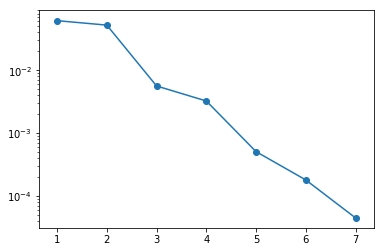

In [96]:
plt.plot(range(1,8),abs(np.asarray(aaff_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2])[1:]/(hfBF.Gradients().grad_nuc()+ge[4])[1,2])
plt.scatter(range(1,8),abs(np.asarray(aaff_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2])[1:]/(hfBF.Gradients().grad_nuc()+ge[4])[1,2])
plt.yscale("log")
plt.axhline(0,ls='--',color='black')

In [99]:
fd_predict=[]
fd_predict.append((hfBF.Gradients().grad_nuc()+ge[4])[1,2])
fd_predict.append(fd_predict[0]+np.einsum('i,ijk->jk',fd1_8,(np.asarray(ge)))[1,2]/dl)
fd_predict.append(fd_predict[1]+np.einsum('i,ijk->jk',fd2_8,(np.asarray(ge)))[1,2]/dl**2/2)
fd_predict.append(fd_predict[2]+np.einsum('i,ijk->jk',fd3_6,(np.asarray(ge)))[1,2]/dl**3/6)
fd_predict.append(fd_predict[3]+np.einsum('i,ijk->jk',fd4_4,(np.asarray(ge)))[1,2]/dl**4/24 )
fd_predict.append(fd_predict[4]+np.einsum('i,ijk->jk',fd5_4,(np.asarray(ge)))[1,2]/dl**5/120)
fd_predict.append(fd_predict[5]+np.einsum('i,ijk->jk',fd6_2,(np.asarray(ge)))[1,2]/dl**6/720)
np.asarray(fd_predict),np.asarray(fd_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2]

(array([ 0.69160984,  0.00599181, -0.30353499, -0.2712739 , -0.26509673,
        -0.26693001, -0.26732606]),
 array([ 9.58829442e-01,  2.73211416e-01, -3.63153916e-02, -4.05429672e-03,
         2.12287556e-03,  2.89590419e-04, -1.06463085e-04]))

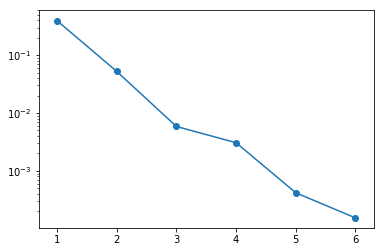

In [100]:
plt.plot(range(1,7),abs(np.asarray(fd_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2])[1:]/(hfBF.Gradients().grad_nuc()+ge[4])[1,2])
plt.scatter(range(1,7),abs(np.asarray(fd_predict)-(hfBF.Gradients().grad_nuc()+gBF)[1,2])[1:]/(hfBF.Gradients().grad_nuc()+ge[4])[1,2])
plt.yscale("log")